<a href="https://colab.research.google.com/github/aaronhowellai/machine-learning-projects/blob/main/machine%20learning%20algorithms/Linear_Regression%2C_Normal_Equation%2C_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Minimising the Cost Function during Linear Regression with the Normal Equation and Singular Value Decomposition.**
* Manually computing using Numpy features
* Following tutorials and guidance from Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Geron.

## **Aim for this notebook**
* Learn how to **manually compute and minimise the cost function for smaller datasets without using gradient descent** to reinforce the fundamentals of addressing loss and what other options there may be to use during the Machine Learning process.

  * Considering **computational complexity, training time, and cost** may help a **business** understand why the use of one method is superior to another, making this exercise a good practice.

In [21]:
# import packages
import numpy as np
from sklearn.preprocessing import add_dummy_feature
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

# **Mean Squared Error**
## $MSE$
* A common performance measure used in Machine Learning training to measure how accurate the ML model is.
  * Because the errors are squared, they are positive like absolute values like with MAE (Mean Absolute Errors), however unlike MAE, MSE is more sensitive to outliers and is therefore much better at capturing them.

### **MSE cost function for a linear regression model:**
## $MSE( X,h_{\theta}  ) = \frac{1}{m} \Sigma^{m}_{i=1} ( \Theta ^{ \text{T}} \text{x}^{(i)} - y^{(i)} )^{2} $

# **The Normal Equation**
* The normal equation solves as a non-iterative closed-form solution (mathematical equation) to find the value of $\Theta$ that minimise the Mean Squared Error.

## $ {\hat{\Theta}} = ( X^{\text{T}} X )^{-1} \space \cdot X^{\text{T}} \cdot y $
  * ${\hat{\Theta}}$ = is the value of Theta that minimises the cost function.
  * $y$ = is the vector of target values containing $y^{1}$ to $y^{m}$.

# **Computing The Normal Equation**
## **Computational Complexity**
  * The computational complexity of inverting a matrix with the normal equation is said to be about O($n^{2.4}$) to O($n^{3}$), depending on the implementation.
    * If you double the number of features, you multiply the computation time by roughly 2^2.4 = 5.3 to 2^3 = 8.

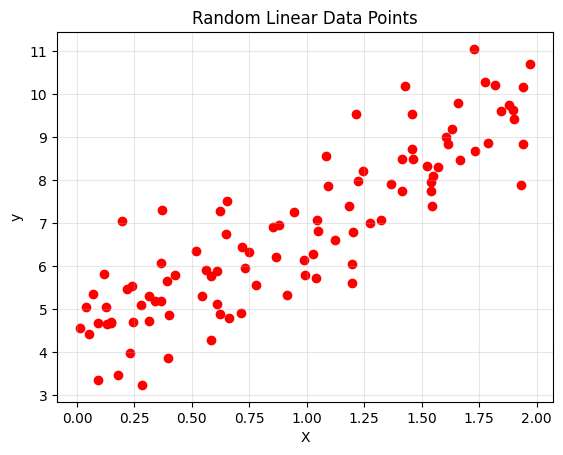

In [9]:
# random linear looking data will be generated and plotted to test the equation
np.random.seed(42)

# number of instances of data points
m = 100

# feature column vector -> .rand gives random values in any shape (-1,1)
X = 2 * np.random.rand(m,1)

# target values vector -> .randn produces a normal distribution, with a column shape in this instance (,1)
y = 4 + 3 * X + np.random.randn(m,1)

plt.scatter(X,y,c='r')
plt.grid(alpha=.3)
plt.ylabel('y')
plt.xlabel('X')
plt.title('Random Linear Data Points')
plt.show()

## **Compute The Function**
* The `inv()` function will be used (from NumPy's Linear Algebra module) to compute the inverse of a matrix.
* `dot()` method will be used for Matrix Multiplication

#### $ {\hat{\Theta}} = ( X^{\text{T}} X )^{-1} \space \cdot X^{\text{T}} \cdot y $

In [11]:
# add x0 = 1 to each instance
X_b = add_dummy_feature(X)

# inimise the MSE with the normal equation
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [13]:
# optimal MSE parameters
theta_best

array([[4.21509616],
       [2.77011339]])

In [16]:
# make predictions
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

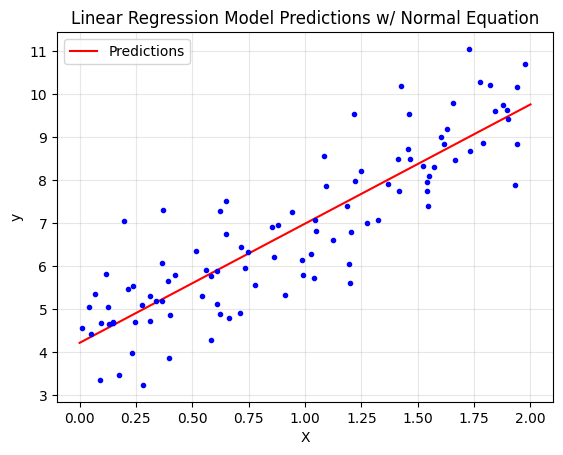

In [20]:
# plot the model's predictions
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X,y, "b.")
plt.grid(alpha=.3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model Predictions w/ Normal Equation')
plt.legend()
plt.show()


## **Linear Regression using Scikit-Learn with Singular Value Decomposition**
* This approach is more efficient than the normal equation and handles edge cases or outliers better.
  * It should be noted that this method is particularly useful for when $X^{\text{T}}X$ is not invertible, however the pseudoinverse can still be used.

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print('Intercpet, theta_0:',lin_reg.intercept_)
print('Coefficient, theta_1:',lin_reg.coef_)

Intercpet, theta_0: [4.21509616]
Coefficient, theta_1: [[2.77011339]]


## **Pseudoinverse Method**
* Computed using the matrix factorization method called Singular Value Decomposition.

In [24]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])